Aufgabe 26
b) Erzeugen Sie in Python ein eigenes Beispiel, bei dem ein einfaches lineares Regressionsmodell scheinbar gut funktioniert, d. h. einen relativ hohen R2-Wert liefert, bei genauerem Hinsehen jedoch systematisch versagt,wie hier beschrieben.
Visualisieren Sie insbesondere auch den Residualplot.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [130]:
from utils import *

In [131]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [132]:
rng = np.random.default_rng(RANDOM_SEED)
x_lim = (0, 10)
n_points = 30

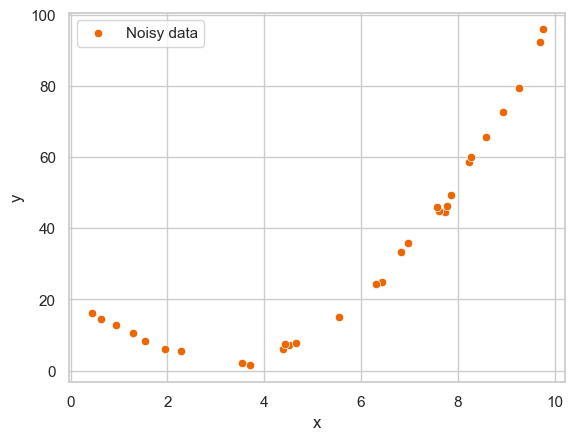

In [133]:
def noise(x, std=1):
    return rng.normal(0, std, len(x))
def true_function(x):
    return 2 * np.power(x - 3, 2) + 3
def noisy_function(x):
    return true_function(x) + noise(x, 2)

def u_function(x_lim, size, rng):
    x = rng.uniform(*x_lim, size)
    _noise = noise(x, 0.7)
    y = noisy_function(x)
    return pd.DataFrame({'x': x, 'y': y}).copy()
df = u_function(x_lim, n_points, rng)
sns.scatterplot(x=df.x, y=df.y, label='Noisy data');

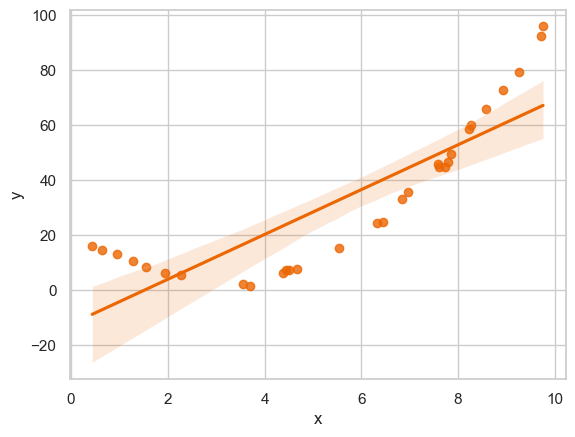

In [134]:
sns.regplot(x=df.x, y=df.y, label='Linear regression');

In [135]:
from statsmodels.api import OLS
from statsmodels.tools import add_constant
X = add_constant(df.x)
y = df.y
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     74.93
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.10e-09
Time:                        21:23:26   Log-Likelihood:                -122.82
No. Observations:                  30   AIC:                             249.6
Df Residuals:                      28   BIC:                             252.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4794      5.943     -2.100      0.0

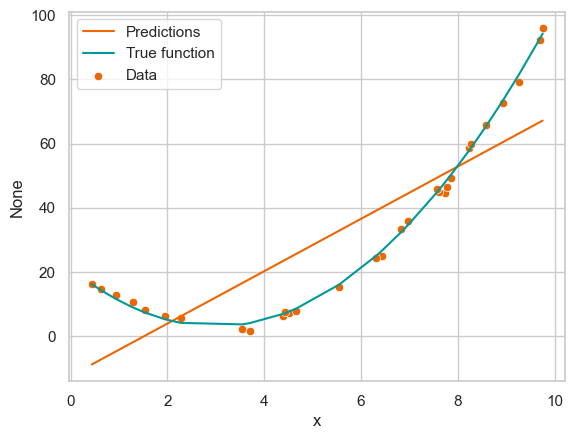

In [136]:
sns.lineplot(x=df.x, y=results.predict(X), label='Predictions');
sns.lineplot(x=df.x, y=true_function(df.x), label='True function');
sns.scatterplot(x=df.x, y=df.y, label='Data');

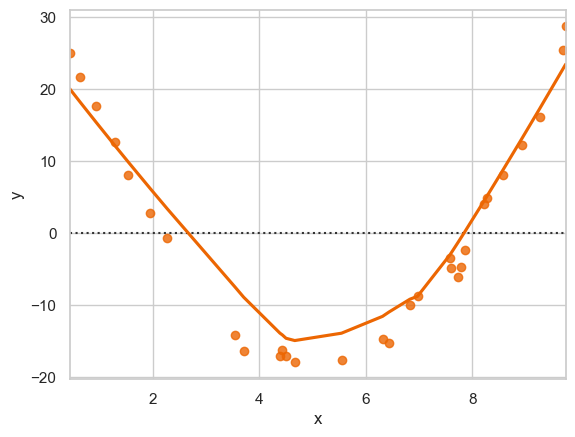

In [139]:
sns.residplot(x=df.x, y=df.y, lowess=True, label='Residuals');

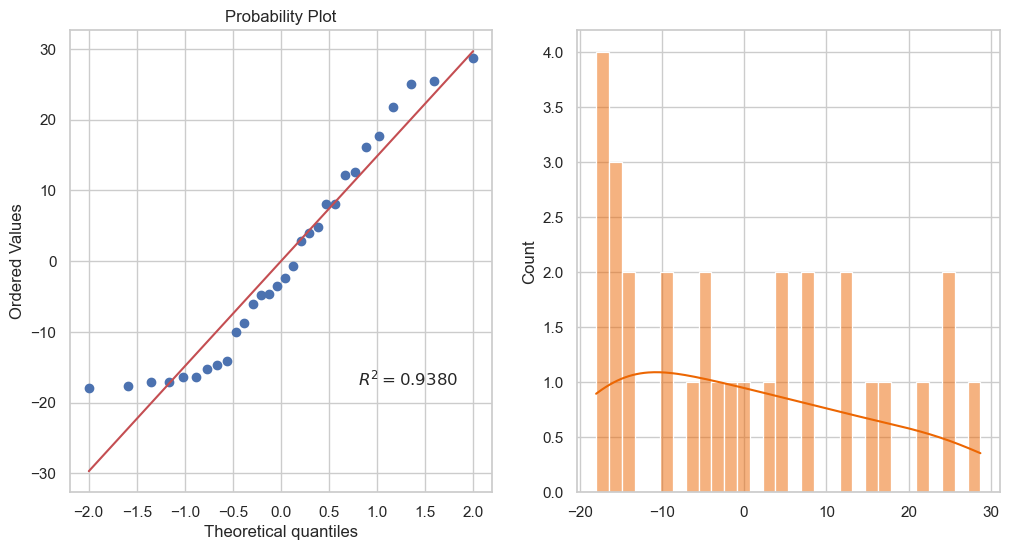

Shapiro-Wilk normality test: p-value = 0.0274991872171847
D'Agostino's K^2 normality test: p-value = 0.13600904328328886
Kolmogorov-Smirnov normality test: p-value = 0.6284016704355042
Anderson-Darling normality test: statistic = 0.6874998506972112, critical value = 0.712


In [138]:
check_normality(results.resid)

c) Was sagt ein hoher R2-Wert über die Modellgüte aus und was sagt er nicht aus? Beziehen Sie sich in Ihrer Antwort auch auf Ihr eigenes Beispiel.

R2 sagt nur "wie gut die Abweichung in Daten durch unser Model erklärt wird" aber nicht "wie gut das Modell selbst ist bzw. ob das Model wirklich das Zusammenhang zwischen Variablen erkennt".